In [3]:
import numpy as np
from scipy import fft
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 15})
#%config InlineBackend.figure_format='retina'

In [202]:
N = 257 # number of grid points in x
xlim = [0, 2*np.pi] # bound of x
L  = xlim[1] - xlim[0]
xj = np.linspace(*xlim, N + 1)[:-1]
Dx = xj[1] - xj[0]
kj = np.hstack([
    np.arange(0,   N/2),     # k > 0 domain
    np.arange(-int(N/2), 0), # k < 0 domain
]) * 2*np.pi/L

dt = Dx / 8   # stability criterion is a whole different subject...
tmax = 8      # the maximum time to integrate
datadump_freq = int(0.05 / dt) # intermediate data dump frequency
outer_loop_count = int(tmax/dt / datadump_freq)



cj = .2 + np.sin(xj - 1)**2
uj = np.exp(-100 * (xj - 1)**2)              # u(  0, x)
uj_old = np.exp(-100 * (xj - 1 + .2*dt + .2 * uj)**2) # u(-Dt, x)

# time and u data containers
t_data = [dt] * (1 + outer_loop_count)
u_data = [uj] * (1 + outer_loop_count)

max_u = []
max_t = []
for i, index in enumerate(range(outer_loop_count)):
    t_data[i] *= i * datadump_freq
    u_data[i]  = uj
    
    # 최대 진폭과 그떄의 시간,
    max_t.append(t_data[i])
    max_u.append((max(abs(u_data[i]))- min(abs(u_data[i]))) / 2)
    
    for _ in range(datadump_freq):
        Uj = fft.fft(uj)
        Wj = 1j*kj * Uj
        wj = fft.ifft(Wj).real
        uj_old, uj = uj, uj_old - 2*dt*cj*wj

t_data[-1] *= i * datadump_freq
u_data[-1]  = uj

max_u1 = [abs(u_data[i]) for i in range(len(u_data))]


In [125]:
len(u_data[0])

257

In [106]:
9.99435685e-001

0.999435685

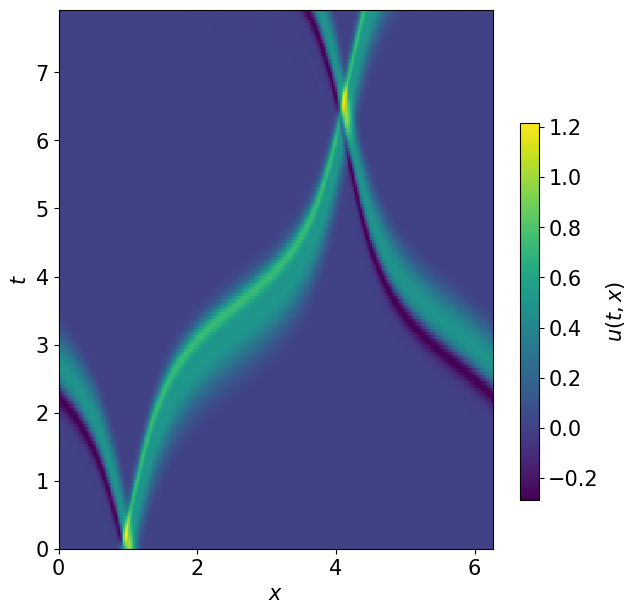

In [117]:
fig, ax = plt.subplots(figsize=(7, 7), ncols=1)


pos = ax.imshow(u_data, interpolation='none', origin='lower', cmap='viridis',
           extent=np.hstack(([xj[0], xj[-1]], [t_data[0], t_data[-1]])),
           aspect='auto')
fig.colorbar(pos, ax=ax, location='right', anchor=(0, 0.3), shrink=0.7,
             label="$u(t, x)$")
ax.set_xlabel("$x$")
ax.set_ylabel("$t$")


plt.show()

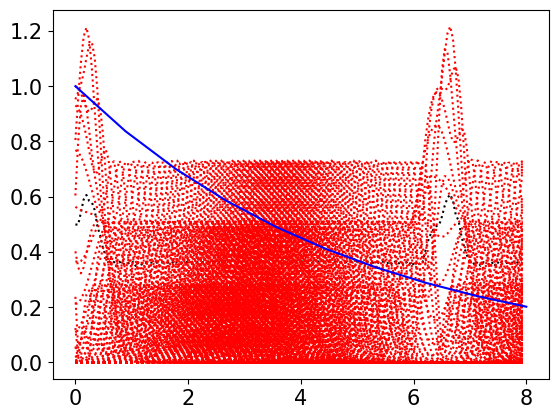

In [203]:
plt.plot(max_t, max_u, ':k', t_data, max_u1, ":r", x, np.exp(-x/5), "b")

ValueError: x and y must have same first dimension, but have shapes (164,) and (163,)

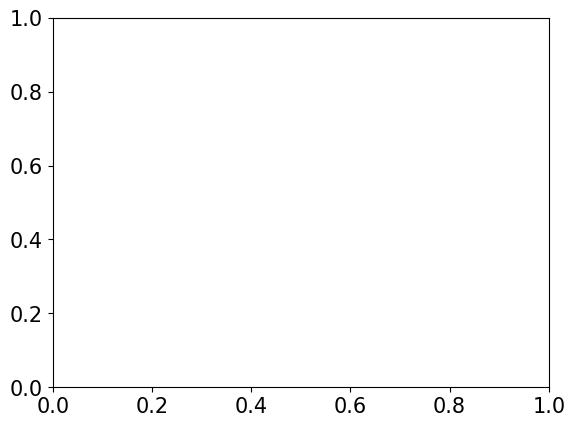

In [196]:
x = np.linspace(0, 8, 10)
plt.plot(t_data, max_u, ':k', x, np.exp(-x/5), "k")
plt.show()

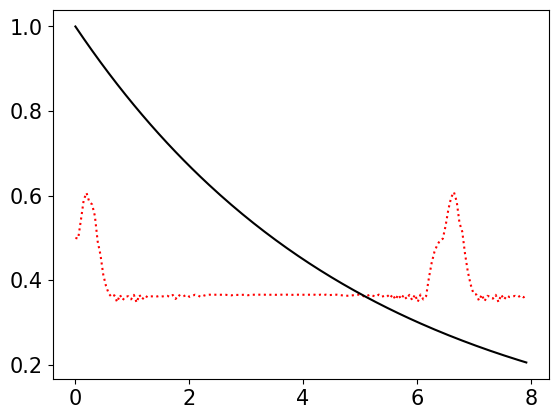

In [204]:
y = [np.exp(-t/5) for t in max_t]
plt.plot(max_t, max_u, ':r', max_t, y, "k")
plt.show()

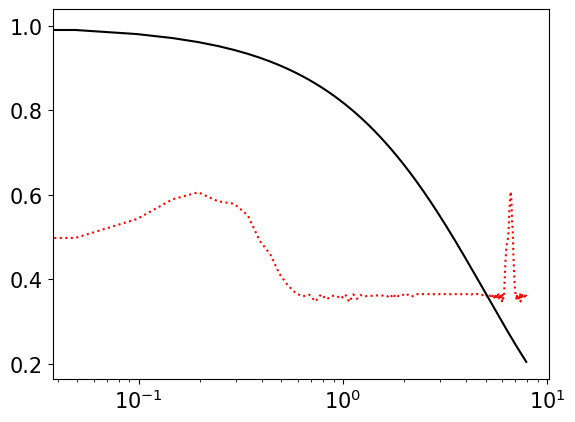

In [215]:
x = np.linspace(0, 6, 100)

y = [np.exp(-t/5) for t in max_t]
plt.semilogx(max_t, max_u, ':r', max_t, y, "k")
plt.show()